# Task - data preparation, basic statistical analysis

You will try to process a very similar dataset as in the lecture. This time the house prices are from Portland and are relatively recent.

## Portland Housing Prices/Sales Jul 2020 - Jul 2021
- https://www.kaggle.com/datasets/threnjen/portland-housing-prices-sales-jul-2020-jul-2021
- 348 columns
- 25681 records

To make things easier, only some columns were selected from the original dataset and the number of records was also significantly reduced.

!!! For this reason, the subset created may not statistically match the original dataset.

A bonus task is to process the original dataset.

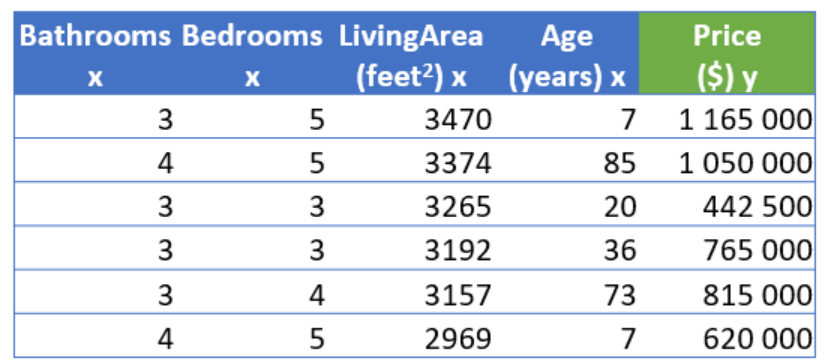

# Task

- Perform a statistical analysis of the data
- Visualize the data
- Select appropriate variables for the linear model
- Standardize the data

## Reading data from CSV file

In [3]:
import pandas as pd 

In [4]:
data = pd.read_csv ("..\\dataset\\portland_filtered.csv",  sep=';')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   bathrooms   100 non-null    int64
 1   bedrooms    100 non-null    int64
 2   livingArea  100 non-null    int64
 3   age         100 non-null    int64
 4   price       100 non-null    int64
dtypes: int64(5)
memory usage: 4.0 KB


## Basic data characteristics
- data preview
- display of basic statistics (average, minimum, maximum, ...)
- checking NaN values

In [6]:
data.head(10)

,bathrooms,bedrooms,livingArea,age,price
0,3,5,3470,7,1165000
1,4,5,3374,85,1050000
2,3,3,3265,20,442500
3,3,3,3192,36,765000
4,3,4,3157,73,815000
5,4,5,2969,7,620000
6,2,4,2964,113,570000
7,3,4,2929,6,620000
8,3,4,2908,19,660000
9,3,4,2853,29,710000


In [7]:
data.describe()
data.isna().sum()

bathrooms     0
bedrooms      0
livingArea    0
age           0
price         0
dtype: int64

## Data distribution
- charts with data distribution
- boxplot charts
- describe what the data is (skewed values, ...)

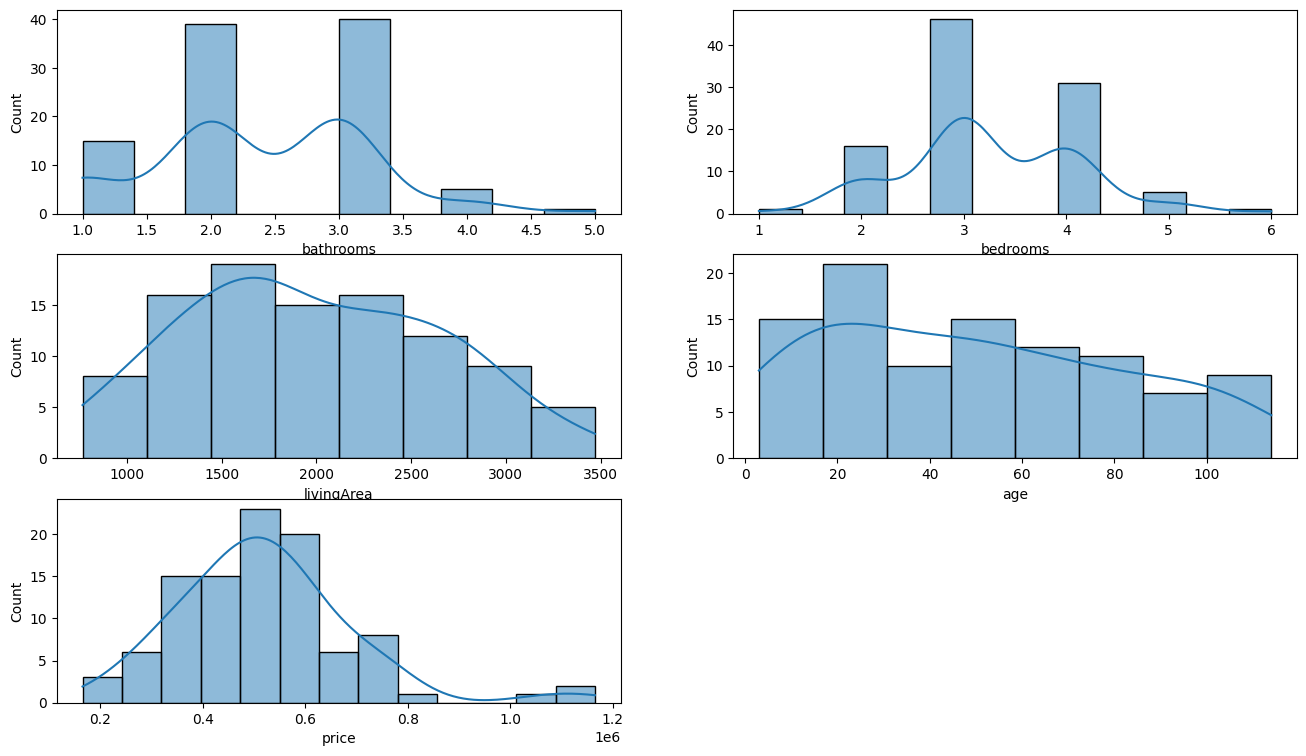

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
pos = 1
num_cols = len(data.columns)
rows = (num_cols + 1) // 2
fig = plt.figure(figsize=(16, rows * 3))
for i in data.columns:
    ax = fig.add_subplot(rows, 2, pos)
    pos = pos + 1
    sns.histplot(data[i], ax=ax, kde=True)

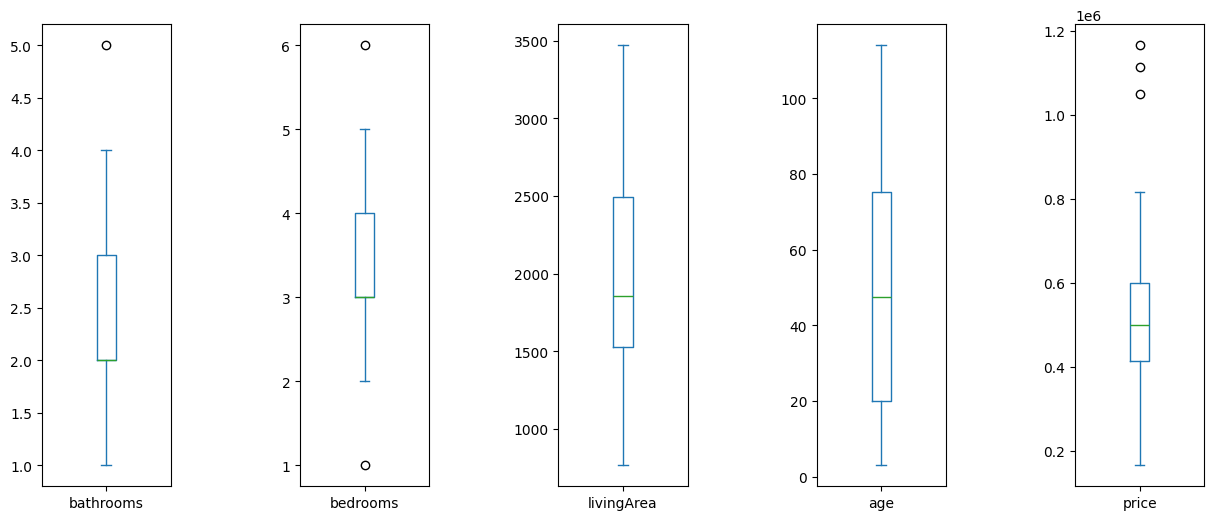

In [9]:
data.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(15, 6)
)
plt.subplots_adjust(wspace=1) 
plt.show()

## Relationships between data
- pairplot
- correlation table
- Determine which columns are linearly dependent, suitable for explaining price

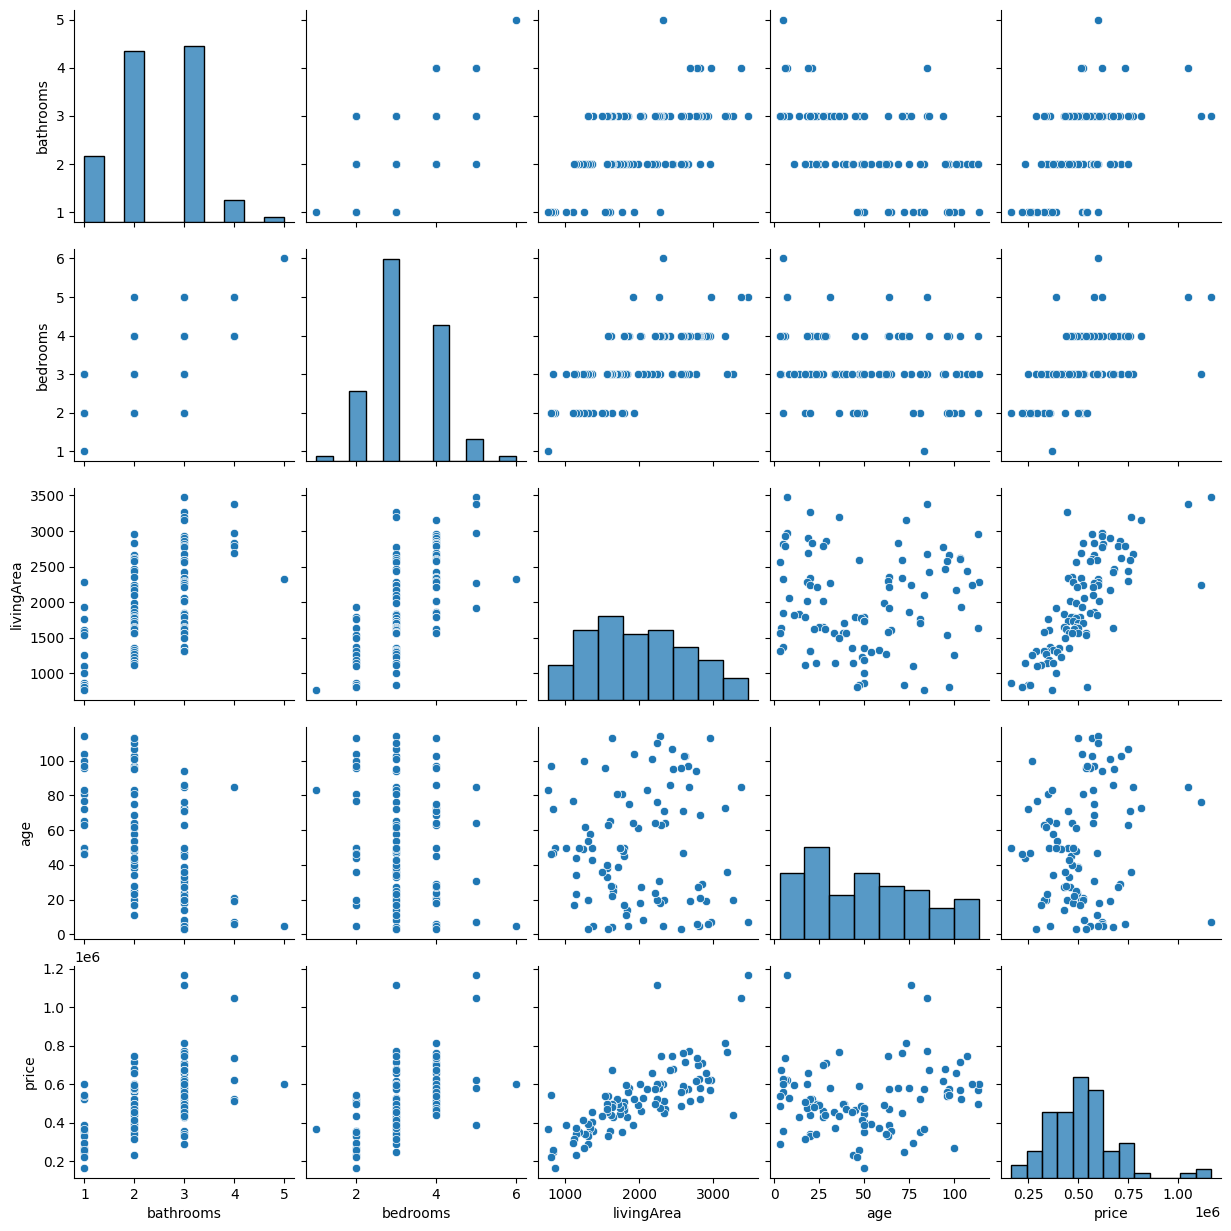

In [10]:
sns.pairplot(data)

In [11]:
corr=data.corr()
corr

,bathrooms,bedrooms,livingArea,age,price
bathrooms,1.000000,0.618132,0.566558,-0.536517,0.463856
bedrooms,0.618132,1.000000,0.641684,-0.224947,0.498934
livingArea,0.566558,0.641684,1.000000,0.019381,0.759973
age,-0.536517,-0.224947,0.019381,1.000000,0.114328
price,0.463856,0.498934,0.759973,0.114328,1.000000


<Axes: >

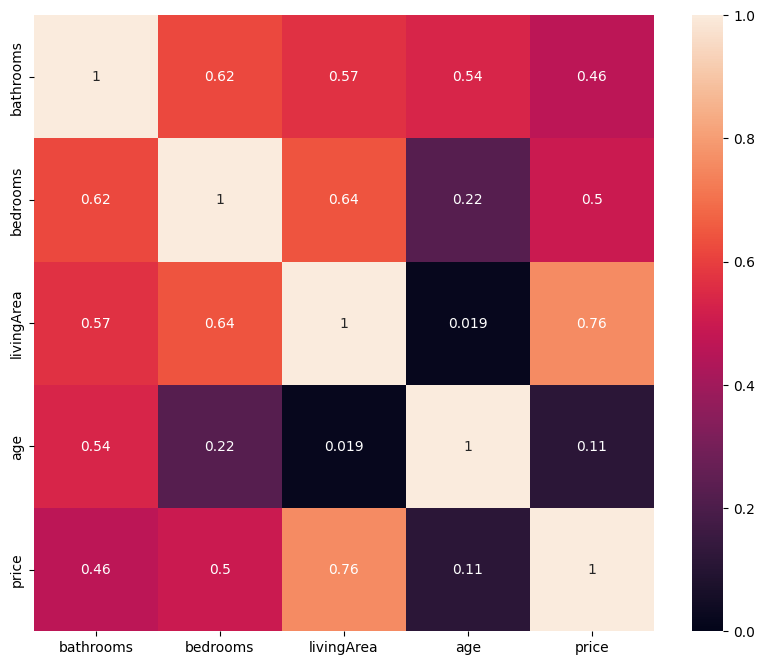

In [12]:
plt.figure(figsize = (10,8))
sns.heatmap(corr.abs(), annot=True, vmin=0, vmax=1)

The features more suitable for explaning the price are bathrooms, bedrooms and livingArea

## Data standardization

Each function has a different mean, standard deviation.

Standardization center and scale function.

Reasons:
* to prevent some functions from dominating the model.
* can help machine learning models converge faster
* can facilitate interpretation of machine learning model coefficients

Calculation:
* x_new = (x - mean) / standard_deviation
* mean = sum of (x) / number of (x)
* standard_deviation = sqrt( sum ( (x - mean)^2 ) / count (x))

- perform the standardization of the columns used for the linear regression
- show the distribution of the original and standardised data
*** Translated with www.DeepL.com/Translator (free version) ***



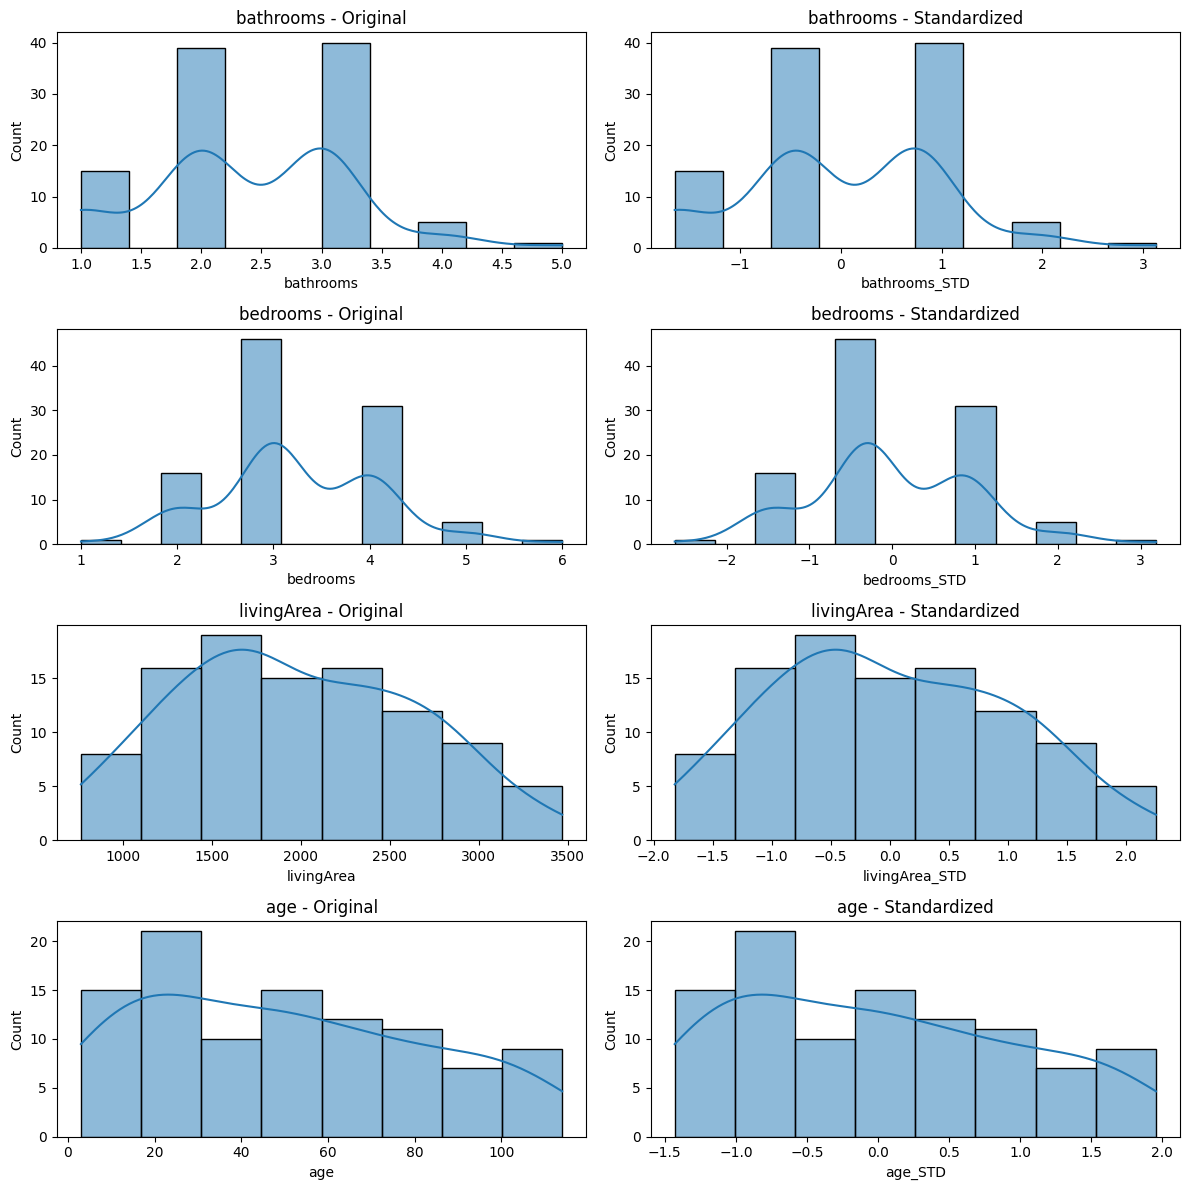

In [13]:
features = ['bathrooms', 'bedrooms', 'livingArea', 'age']

for feature in features:
    data[f'{feature}_STD'] = (data[feature] - data[feature].mean()) / data[feature].std()
    
data.head()
fig, axes = plt.subplots(len(features), 2, figsize=(12, len(features) * 3))

for idx, feature in enumerate(features):
    sns.histplot(data[feature], ax=axes[idx, 0], kde=True)
    axes[idx, 0].set_title(f'{feature} - Original')
    
    sns.histplot(data[f'{feature}_STD'], ax=axes[idx, 1], kde=True)
    axes[idx, 1].set_title(f'{feature} - Standardized')

plt.tight_layout()
plt.show()